In [1]:
import opendatasets as od

In [2]:
dataset = 'https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python'

In [3]:
od.download(dataset)

Skipping, found downloaded files in ".\customer-segmentation-tutorial-in-python" (use force=True to force download)


In [4]:
import os

In [5]:
data_dir = 'customer-segmentation-tutorial-in-python'

In [6]:
os.listdir(data_dir)

['.ipynb_checkpoints']

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
customer_df = pd.read_csv('Mall_Customers.csv',encoding= 'unicode_escape') 

In [9]:
customer_df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# Shape
customer_df.shape

# info
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
# Descriptive Analysis
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
#check for missing values
customer_df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
#summary of dataset
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
#view statistical summary of numerical variables
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
# Declare feature vector and target variable

X = customer_df

y = customer_df['Gender']

In [16]:
# Convert categorial variable/object into integers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Gender'] = le.fit_transform(X['Gender'])

y = le.transform(y)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int32
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 7.2 KB


In [18]:
# Feature scaling
cols = X.columns

from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [19]:
X = pd.DataFrame(X, columns=[cols])

In [20]:
X.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.008197,0.051020
3,0.015075,0.0,0.096154,0.008197,0.775510
4,0.020101,0.0,0.250000,0.016393,0.397959


<function matplotlib.pyplot.show(close=None, block=None)>

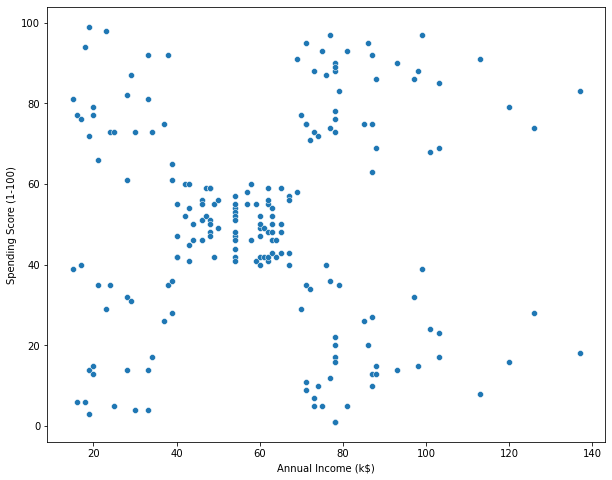

In [21]:
#### Exploratory Data Analysis (EDA)
#scatter plot 
plt.figure(figsize=(10, 8))
sns.scatterplot(data=customer_df,x='Annual Income (k$)', y='Spending Score (1-100)')
plt.show

#shows around 4+ clusters

<Figure size 864x720 with 0 Axes>

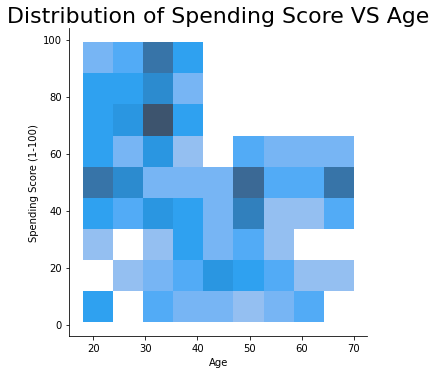

In [22]:
plt.figure(figsize=(12,10))
sns.displot(data= customer_df,y='Spending Score (1-100)',x='Age')
plt.title("Distribution of Spending Score VS Age", fontsize = 22)
plt.show()
#shows that age 20 to 40 have high spending scores

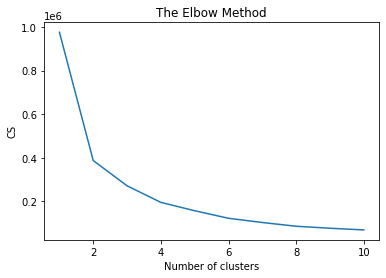

In [36]:
#### Identifying optimal number of clusters to use
#elbow method

from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
    model.fit(customer_df)
    cs.append(model.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


# kink when number of cluster = 2

In [31]:
#cluster analysis

from sklearn.cluster import KMeans

Xfeatures = customer_df[['Age','Annual Income (k$)','Spending Score (1-100)']]

model= KMeans(n_clusters=5)

#train
model.fit(Xfeatures)




KMeans(n_clusters=5)

In [32]:
pred= model.predict(Xfeatures)

In [33]:
pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [34]:
customer_df['Clusters'] = pred

<AxesSubplot:title={'center':'cluster of income'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

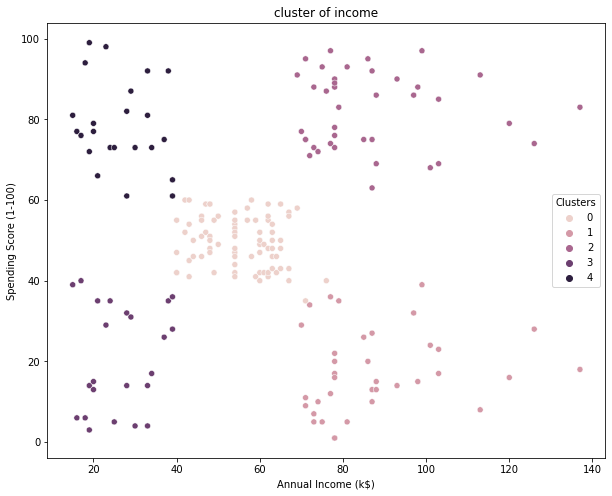

In [35]:
plt.figure(figsize=(10,8))
plt.title('cluster of income')
sns.scatterplot(data=customer_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue= 'Clusters')
